Problem Statement: Will the data predict that the amount of cows infected with Cattle Fever increased in quarantine?

Dataset: The dataset has loads of information regarding the prediction of cows infected with Cattle Fever over a period of
time. There were regression models already done along with many other graphs and predictions that were included but I will be removing in order to do my own research. The data that will be used is the year, amount of infected, and temperature.

Target Variable: I will be making my target variable the CFT column.

Prediction Goal: To accurately determine the outcome of CF numbers using prediction models using the dataset and relevant features.

In [8]:
#Question 2 Part 1: Data Clean

import pandas as pd

df = pd.read_csv('cft-data.csv')
cols = df.columns   
df.drop(remove, inplace=True, axis=1)
remove = ['Project']

df = df.dropna()

df.to_csv('cft-data.csv', index=False)
print(df)

      Year   CFT  AverTemp Oct thr Sep  AverTemp Dec thr Feb
9   1959.0   3.0                 21.72                 12.97
10  1960.0   2.0                 21.94                 14.00
11  1961.0   9.0                 22.21                 12.68
12  1962.0  20.0                 22.52                 15.02
13  1963.0  21.0                 22.88                 12.80
..     ...   ...                   ...                   ...
66  2016.0  45.0                 23.72                 15.80
67  2017.0  49.0                 24.31                 17.58
68  2018.0  45.0                 23.62                 14.67
69  2019.0  40.0                 23.37                 15.36
70  2020.0  39.0                 24.00                 16.44

[62 rows x 4 columns]


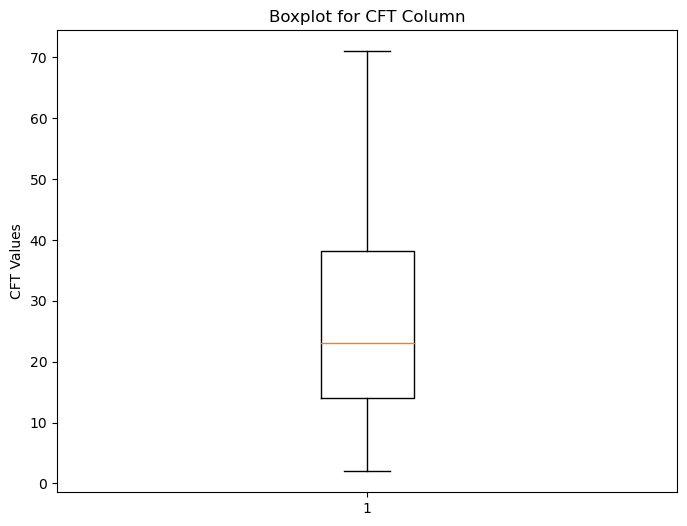

In [11]:
#Question 2 Part 2: BoxPlot Outliers

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('cft-data.csv')

plt.figure(figsize=(8, 6))
plt.boxplot(df['CFT'])
plt.title('Boxplot for CFT')
plt.ylabel('Values')
plt.show()

Chi Information for Regression: [0.79790792 0.26898207 0.12666319]
ANOVA:    F-Statistic   P-Value
0     1.742124  0.074930
1     1.956625  0.041336
2     0.810693  0.722605


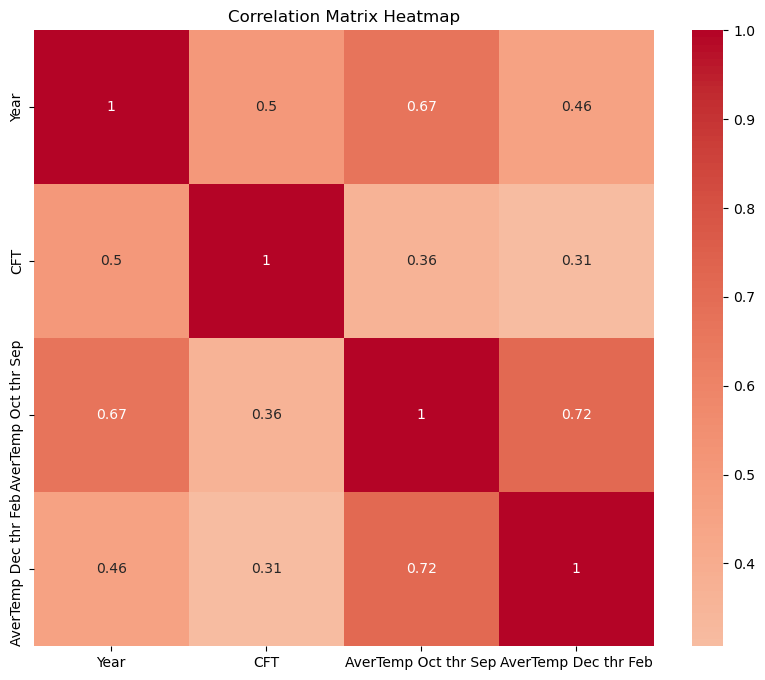

In [21]:
#Question 3 Part 1: Feature Selection

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_classif
df = pd.read_csv('cft-data.csv')

X = df.drop(columns=['CFT'])
y = df['CFT']

#Heatmap Graph
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')

#Chi
mi_reg_corr = mutual_info_regression(X, y)

#ANOVA
f_stat, f_pval = f_classif(X, y)
feature = pd.DataFrame({'F-Statistic': f_stat, 'P-Value': f_pval})

print("Chi Information for Regression:", mi_reg_corr)
print("ANOVA:", feature)
plt.show()

Question 3 Part 2: Feature Scaling

There were no categorical values needed to be changed, therefore there were no dummy variables needed to be added. Between normalized and standardized data, the outliers that would have interfered with normalized data has been removed in previous code making normalized data necessary for the algorithm. The normalized data ranges 0 to 1 are needed for the heatmap graph that shows a visual of the correlation coefficients.

In [49]:
#Question 4: Prediction Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
df = pd.read_csv('cft-data.csv')

X = df[['Year', 'AverTemp Oct thr Sep', 'AverTemp Dec thr Feb']]
y = df['CFT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
r_squared = r2_score(y_test, y_pred)

print("Prediction Array:", y_pred)
print("Precision Score:", precision)
print("R-squared Score:", r_squared)

#Q4 A: The data did not need to be balanced. The CFT had plenty of range without restriction.
#Q4 B: I used train test split as the cross validation had too little members for the splits.
#Q4 C: The algorithm most appropriate for my data is regression in which I show in previous questions.
#Q4 D: I used the precision metric as my data relies on the confirmation that no false-positives were included.
#Q4 E: My R-squared score was -0.9 which shows my predictability was poor and the variability is not being shown well.
#This could be because I used the wrong evaluation metrics and the model couldn't find patterns within the data or I 
#should have used different models to include within the prediction.

Prediction Array: [25. 11. 11. 13. 18. 11. 11. 49. 18. 18. 18. 29. 13.]
Precision Score: 0.625
R-squared Score: -0.9188239279564125
